# MID TEST FGA-MACHINE LEARNING UMM
Disini saya akan mengimplementasikan salah satu metode klastering dari dataset survivalbilitas korban kapal titanic, data tersebut dapat anda download disini: https://tinyurl.com/fga-titanic 

**Oleh Adwin Nugroho S**

In [0]:
#import semua library yang akan digunakan
import random 
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scipy as ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from sklearn import manifold, datasets
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs

In [5]:
#download dataset yang akan diklastering dengan perintah dibawah
!wget -O titanic.csv https://tinyurl.com/fga-titanic #titanic.csv adalah nama file yang akan tersimpan

--2019-10-18 14:48:12--  https://tinyurl.com/fga-titanic
Resolving tinyurl.com (tinyurl.com)... 104.20.219.42, 104.20.218.42, 2606:4700:10::6814:da2a, ...
Connecting to tinyurl.com (tinyurl.com)|104.20.219.42|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/mwaskom/seaborn-data/raw/master/titanic.csv [following]
--2019-10-18 14:48:12--  https://github.com/mwaskom/seaborn-data/raw/master/titanic.csv
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv [following]
--2019-10-18 14:48:12--  https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.gith

In [0]:
#panggil dataset yang telah di download, disini saya menginisialisasi dengan nama titanic.csv
dataset_titanic = pd.read_csv('/content/titanic.csv')

In [13]:
#lihat data dengan perintah berikut
dataset_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
print ("Shape of dataset before cleaning: ", dataset_titanic.size)
dataset_titanic[['survived', 'pclass', 'age','fare']] = dataset_titanic[['survived', 'pclass', 'age','fare']].apply(pd.to_numeric, errors='coerce')
dataset_titanic = dataset_titanic.dropna()
dataset_titanic = dataset_titanic.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", dataset_titanic.size)
dataset_titanic.head(5)
#yang dipakai untuk klasterisasi disini hanya survived, pclass, age, fare
#perintah diatas dilakukan ybtyj menghilang data yang tidak ada isinya (NaN)

Shape of dataset before cleaning:  13365
Shape of dataset after cleaning:  2730


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
1,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
2,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
3,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
4,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [15]:
#lihat info data dengan detail dengan perintah berikut
dataset_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
survived       182 non-null int64
pclass         182 non-null int64
sex            182 non-null object
age            182 non-null float64
sibsp          182 non-null int64
parch          182 non-null int64
fare           182 non-null float64
embarked       182 non-null object
class          182 non-null object
who            182 non-null object
adult_male     182 non-null bool
deck           182 non-null object
embark_town    182 non-null object
alive          182 non-null object
alone          182 non-null bool
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 18.9+ KB


In [46]:
#syarat klaster data harus berupa numeric jadi kita hanya pakai data dibawah
data = dataset_titanic[['survived', 'pclass', 'age','fare']]
data.head()

,survived,pclass,age,fare
0,1,1,38.0,71.2833
1,1,1,35.0,53.1000
2,0,1,54.0,51.8625
3,1,3,4.0,16.7000
4,1,1,58.0,26.5500


In [47]:
#deskripsikan data untuk melihat informasi seperti berapa rata-ratanya dengan perintah
dataset_titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [51]:
from sklearn.preprocessing import StandardScaler
x = data.values[:,1:]
x = np.nan_to_num(x)
normx = StandardScaler().fit_transform(x)
normx
#normalisasi

array([[-3.73419645e-01,  1.52081957e-01, -1.00110129e-01],
       [-3.73419645e-01, -3.98750185e-02, -3.38484771e-01],
       [-3.73419645e-01,  1.17585249e+00, -3.54707823e-01],
       [ 3.51014466e+00, -2.02343043e+00, -8.15671915e-01],
       [-3.73419645e-01,  1.43179512e+00, -6.86542977e-01],
       [ 1.56836251e+00, -1.03860677e-01, -8.64177202e-01],
       [-3.73419645e-01, -4.87774627e-01, -5.69212621e-01],
       [-3.73419645e-01, -1.06364555e+00,  2.41320703e+00],
       [-3.73419645e-01,  8.55924198e-01, -2.87169016e-02],
       [-3.73419645e-01,  1.87969473e+00, -2.22082571e-01],
       [-3.73419645e-01,  5.99981565e-01,  5.97174125e-02],
       [ 1.56836251e+00, -4.23788969e-01, -8.96951044e-01],
       [ 3.51014466e+00, -6.79731602e-01, -9.34313224e-01],
       [-3.73419645e-01, -8.07702919e-01,  2.41320703e+00],
       [-3.73419645e-01,  6.63967223e-01, -2.32625261e-01],
       [-3.73419645e-01,  2.26360868e+00, -5.80300668e-01],
       [-3.73419645e-01, -8.07702919e-01

In [52]:
clusterNum = 3
kmeans = KMeans(init = 'k-means++', n_clusters=clusterNum, n_init=12)
kmeans.fit(x)
labels = kmeans.labels_
print(labels)
#proses klasteriasi menggunakan kmeans

[2 0 0 0 0 0 0 1 2 0 2 0 0 1 0 0 0 2 0 1 0 2 0 0 2 0 2 0 0 0 0 0 0 2 0 0 2
 2 2 2 2 0 0 0 2 2 0 2 2 0 2 2 0 2 1 2 2 0 2 1 2 2 2 0 0 0 2 2 2 0 1 0 0 2
 2 0 1 2 2 0 2 0 0 0 2 1 2 0 0 2 0 0 0 0 2 2 0 0 2 2 2 2 0 0 0 2 0 0 0 2 2
 2 0 2 0 0 0 2 0 2 2 2 0 2 0 0 0 2 0 0 2 2 0 2 0 0 1 2 1 0 2 0 1 0 0 0 0 0
 1 0 0 1 1 2 1 2 0 0 2 2 2 0 1 0 0 2 0 2 0 0 2 0 2 0 0 0 0 0 0 2 0 0]


In [57]:
data['cluster'] = labels
data.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,survived,pclass,age,fare,cluster
0,1,1,38.0,71.2833,2
1,1,1,35.0,53.1000,0
2,0,1,54.0,51.8625,0
3,1,3,4.0,16.7000,0
4,1,1,58.0,26.5500,0
5,1,2,34.0,13.0000,0
6,1,1,28.0,35.5000,0
7,0,1,19.0,263.0000,1
8,1,1,49.0,76.7292,2
9,0,1,65.0,61.9792,0


In [54]:
data.groupby('cluster').mean()

,survived,pclass,age,fare
cluster,,,,
0,0.608247,1.360825,36.479381,32.780888
1,0.750000,1.000000,30.250000,274.813281
2,0.753623,1.000000,35.665507,98.357003


In [62]:
x.shape
x[:,0]

array([1., 1., 1., 3., 1., 2., 1., 1., 1., 1., 1., 2., 3., 1., 1., 1., 1.,
       1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1.,
       3., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 3., 1., 3., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 3., 1., 2., 1., 1., 1.,
       1., 1., 1., 1., 3., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

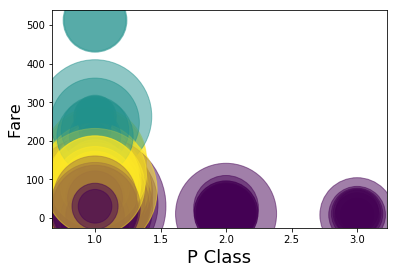

In [63]:
area = np.pi * ( x[:, 1])**2  
plt.scatter(x[:, 0], x[:, 2], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('P Class', fontsize=18)
plt.ylabel('Fare', fontsize=16)

plt.show()

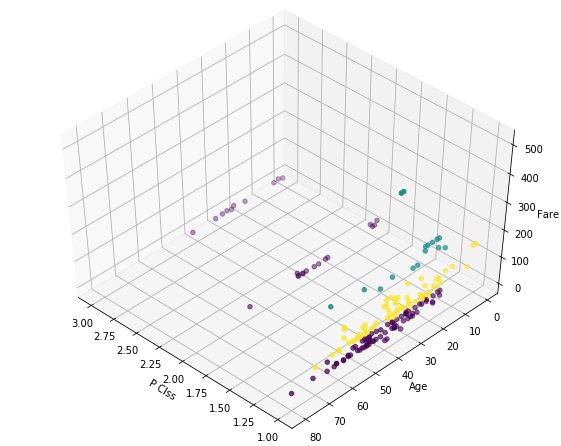

In [65]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('P Clss')
ax.set_ylabel('Age')
ax.set_zlabel('Fare')

ax.scatter(x[:, 0], x[:, 1], x[:, 2], c= labels.astype(np.float))